# Module 2, Activity 4: Visualising Distributions for 1-Dimensional Continuous Data

Barplots are useful if we only have one data point per category (e.g., counts). But what do we do when we have multiple observations in each category? We need to create visualisations to explore the distribution of the data. That's what we'll be doing here using Seaborn.

To begin, we need to load our "taxis" dataset:

In [24]:
# import packages/libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime as dt

# load (and optionally format) dataset
df = pd.read_csv("data/taxis.csv")
df["pickup"] = pd.to_datetime(df["pickup"])
df["dropoff"] = pd.to_datetime(df["dropoff"])

## Histograms and density plots

First, let's create some histograms and density plots.  

We can make histograms with Seaborn using the **displot** call (documentation [here](https://seaborn.pydata.org/generated/seaborn.displot.html), where we specify that we want to visualise the distribution with a histogram (hist). Let's look at the distribution of taxi fares.

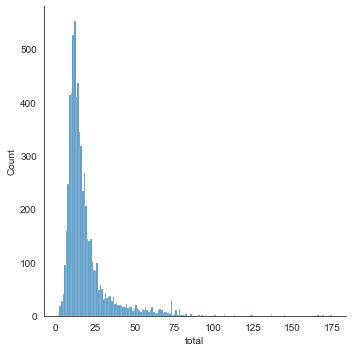

In [25]:
sns.displot(data=df,x="total", kind = "hist") # histogram of taxi ride prices
plt.show()

We can change the number of bins in two ways - by modifying the width of the bins, or specifying the total number of bins:

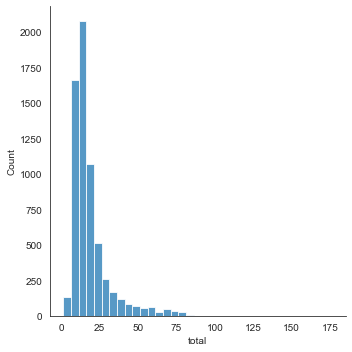

In [26]:
sns.displot(data=df,x="total", kind = "hist", binwidth=5) # change the bin width
plt.show()

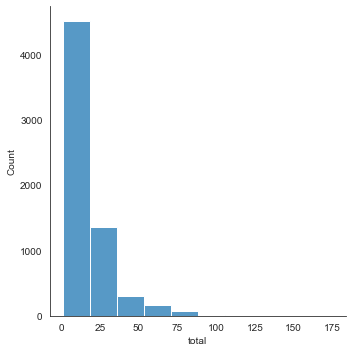

In [27]:
sns.displot(data=df,x="total", kind = "hist", bins=10) # change the number of bins
plt.show()

Now for density plots. We can create density plots also using the **displot** call, but we need to specify that the kind of distribution we want to visualise is a 'kernel density estimation' (kde). Don't worry if you've never heard of a kernel density estimation before - it's an estimate of the probability density function from your data.

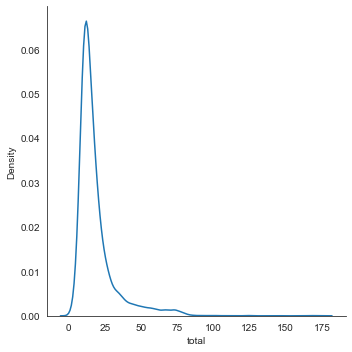

In [28]:
sns.displot(data=df, x="total", kind='kde')
plt.show()

What if we want to overlay multiple density plots? We can distinguish them by colour (hue). For example, below is a figure with total fare by payment type.

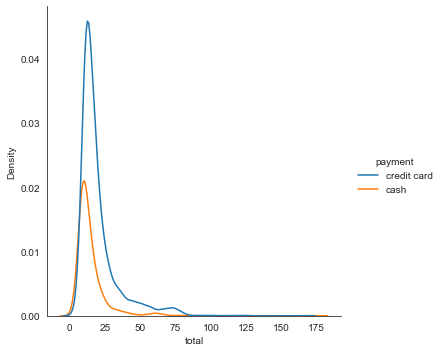

In [32]:
sns.displot(data=df, x="total", hue = "payment", kind='kde')
plt.show()

We can overlay a density plot on a histogram as well, sometimes this can be a helpful addition for your audience, since the shape of the density curve does not depend on the number of histogram bins. Play around with the bins parameter in the **displot** call below to see this.

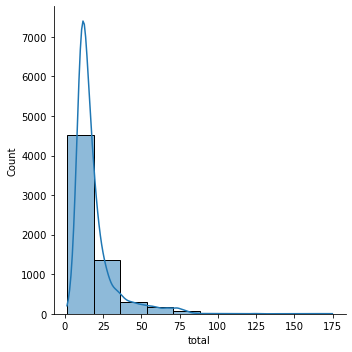

In [28]:
sns.displot(data=df, x="total", kind='hist', kde=True, bins = 10) # overlay density plot on histogram
plt.show()

Sometimes we want to focus on only a subset of the data, which means we need to do some Pandas subsetting before we can visualise. For example, let's try looking at only trips where the pickup and drop off are within the same borough. We'll have to subset our dataset first, then visualise the subset.

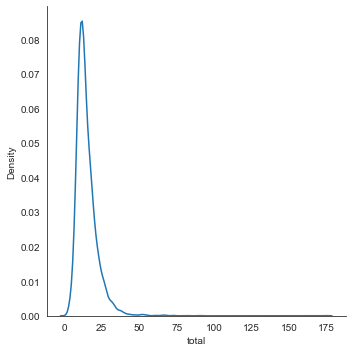

In [33]:
df1=df[df["pickup_borough"]==df["dropoff_borough"]] # within same borough

sns.displot(data=df1, x="total", kind='kde')
plt.show

**Exercise:** Plot the density of total fares for trips where the pickup borough is different to the dropoff borough. Based on this density plot, and the one you generated earlier, how does the distribution of total fares compare where the pickup borough is the same as the drop off borough, and where they are not the same?

Finally, what if we wanted to overlay multiple histograms, with their density plots as well? There's a few ways to do this. The easiest is with the single-line Seaborn command **histplot**. To show this, let's plot the distribution of total fares, split by payment type, with their density estimates included as well:

<AxesSubplot:xlabel='total', ylabel='Count'>

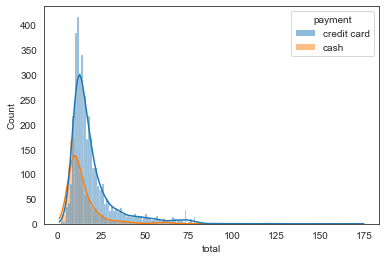

In [35]:
sns.histplot(data=df, x="total", hue = "payment", kde = True)
plt.show()

Since Seaborn is built with Matplotlib, we can use Matplotlib directly with Seaborn to modify Seaborn figures. We can do this using Matplotlib, or Pyplot. Pyplot comes with Matplotlib - we imported it earlier from Matplotlib as **plt**. Pyplot is a plotting library which is closer to the object-orientied approach of Matplotlib than Seaborn, but it's a bit simpler to use than base Matplotlib.

In [1]:
sns.histplot(data=df, x="total", hue = "payment", kde = True)
plt.xlabel("Total Fare") # Use Pyplot to modify the x-axis
plt.show()

NameError: name 'sns' is not defined

**Exercise:** 
1) Write a comment for each line of the Pyplot code in the command above, clearly explaining what each line is doing.\
2) Read 'The object-oriented and the pyplot interfaces' under the Coding Styles section of the document [here](https://matplotlib.org/stable/tutorials/introductory/usage.html) to gain an overview of the differences between Pyplot and base Matplotlib. We'll mainly be using the object-oriented Matplotlib style, when we use Matplotlib, but sometimes we will use Pyplot too.

## Boxplots and Violin plots

Boxplots and violin plots are designed to summarise continuous data grouped by different categories. Let's plot the distribution of fare totals, by pickup borough. We can use Seaborn's **catplot** function to quickly generate boxplots and violin plots (documentation [here](https://seaborn.pydata.org/generated/seaborn.catplot.html)).

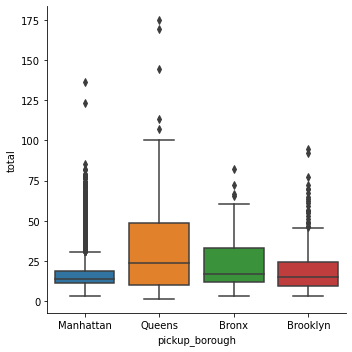

In [36]:
sns.catplot(data=df,kind = "box",x="pickup_borough",y="total")
plt.show()

Violin plots have a very similar syntax:

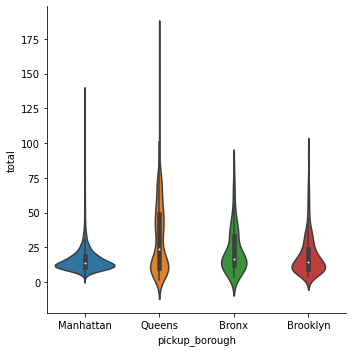

In [37]:
sns.catplot(data=df, kind = "violin", x="pickup_borough",y="total")
plt.show()

We can show categories within different groups. For example, let's look at the total fares by payment type, for each pickup borough, with a boxplot.

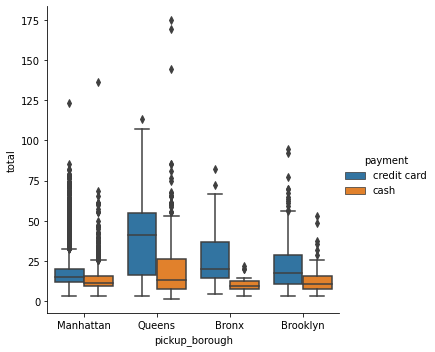

In [38]:
sns.catplot(data=df,x="pickup_borough",y="total", hue="payment", kind="box")
plt.show()

It's quite hard to compare these individual boxplots because they are all squished up, let's try some variations. For example, let's change the axis around, to change the orientation of the figure.

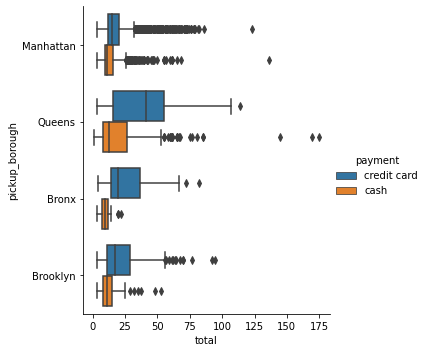

In [41]:
sns.catplot(data=df,kind = "box",y="pickup_borough",x="total", hue="payment")
plt.show()

Next, let's remove the outliers:

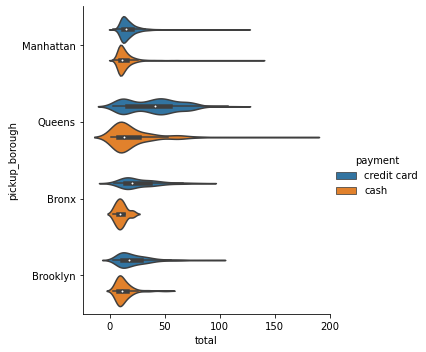

In [44]:
sns.catplot(data=df, kind = "box", y="pickup_borough",x="total", hue="payment", orient="h", showfliers=False)
plt.show()

**Exercise:** How is the number of passengers related to the distance of a fare? To answer this question, we've generated the figure below:

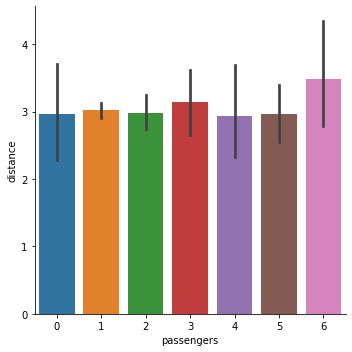

In [49]:
sns.catplot(x="passengers", y="distance", kind="bar", data=df)
plt.show()

In a few sentences, explain why this is not the best visualisation to address this question. Create an alternative figure that is better-suited from what you have learned so far.